# Hotel Booking Analysis
We have a dataset of hotel reservations in some hotel.  
The table contains the follow columns:
- Booking_ID: unique identifier of each booking
- no_of_adults: Number of adults
- no_of_children: Number of Children
- no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- type_of_meal_plan: Type of meal plan booked by the customer:
- required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
- room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
- lead_time: Number of days between the date of booking and the arrival date
- arrival_year: Year of arrival date
- arrival_month: Month of arrival date
- arrival_date: Date of the month
- market_segment_type: Market segment designation.
- repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
- no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
- no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
- avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
- no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- booking_status: Flag indicating if the booking was canceled or not.
### Overall goal: To analyze booking patterns, identify factors influencing cancellations, and provide actionable insights to increase bookings and reduce cancellation rates.
---
## 1. Data Preparation & Exploratory Data Analysis (EDA)

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

bookings = pd.read_csv('hotel_reservations.csv')
bookings.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### 1.1 Data Quality Check
Missing values, data types, unique values, outliers.

In [37]:
# Checking how many missing values we have and the dtypes of the columns
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

### Conclusion:
We have no missing values and the columns have the right dtype.

In [38]:
# Checking the outliers
bookings.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


### Conclusion:
The standard deviation is close to mean for each column, at this moment the quality of data looks pretty good.

In [39]:
# Checking the unique values for each non-number column
print('==========Unique values=======================')
print('type_of_meal_plan:   ', bookings['type_of_meal_plan'].unique())
print('room_type_reserved:  ', bookings['room_type_reserved'].unique())
print('market_segment_type: ', bookings['market_segment_type'].unique())
print('booking_status:     ', bookings['booking_status'].unique())

==========Unique values=======================
type_of_meal_plan:    ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
room_type_reserved:   ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
market_segment_type:  ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
booking_status:      ['Not_Canceled' 'Canceled']


### Conclusion:
The check shows no anomalies, we can continue.
## 1.2 Feature Engineering 
Creating new columns that we will use for deeper analysis.

In [40]:
bookings['total_guests'] = bookings['no_of_adults'] + bookings['no_of_children']
bookings['total_nights'] = bookings['no_of_weekend_nights'] + bookings['no_of_week_nights']
bookings['total_stay_cost'] = bookings['total_nights'] * bookings['avg_price_per_room']
guest_type_conditions = [
    bookings['total_guests'] == 1,
    bookings['total_guests'] == 2,
    (bookings['total_guests'] >= 3) & (bookings['total_guests'] <= 4),
    bookings['total_guests'] > 4
]
guest_type_categories = ['solo', 'couple', 'family', 'group']
bookings['guest_type'] = np.select(guest_type_conditions, guest_type_categories, default='unknown')
bookings['arrival_full_date'] = pd.to_datetime(
    bookings['arrival_date'].astype('str') + '/' +
    bookings['arrival_month'].astype('str') + '/' +
    bookings['arrival_year'].astype('str'),
    format='%d/%m/%Y',
    errors='coerce'
)
# checking if was the data transforming succesful
invalid_dates = bookings[bookings['arrival_full_date'].isna()]
print("===============Problematic rows==================")
print(invalid_dates[['arrival_year', 'arrival_month', 'arrival_date']])

===============Problematic rows==================
       arrival_year  arrival_month  arrival_date
2626           2018              2            29
3677           2018              2            29
5600           2018              2            29
6343           2018              2            29
7648           2018              2            29
8000           2018              2            29
8989           2018              2            29
9153           2018              2            29
9245           2018              2            29
9664           2018              2            29
9934           2018              2            29
10593          2018              2            29
10652          2018              2            29
10747          2018              2            29
11881          2018              2            29
13958          2018              2            29
14304          2018              2            29
15363          2018              2            29
15438          2018

### Conclusion: some rows have incorrect dates
We have some amount of rows that has date *29.02.2018* (but the thing is that **February 2018 has only 28 days**).  
The amount is not so huge, so the best decision will be to change `arrival_date` to **28**.

In [41]:
feb29_mask = (bookings['arrival_year'] == 2018) & (bookings['arrival_month'] == 2) & (bookings['arrival_date'] == 29)
bookings.loc[feb29_mask, 'arrival_date'] = 28

## 1.3 Univariate Analysis
Understanding individual variables (variable visualization)

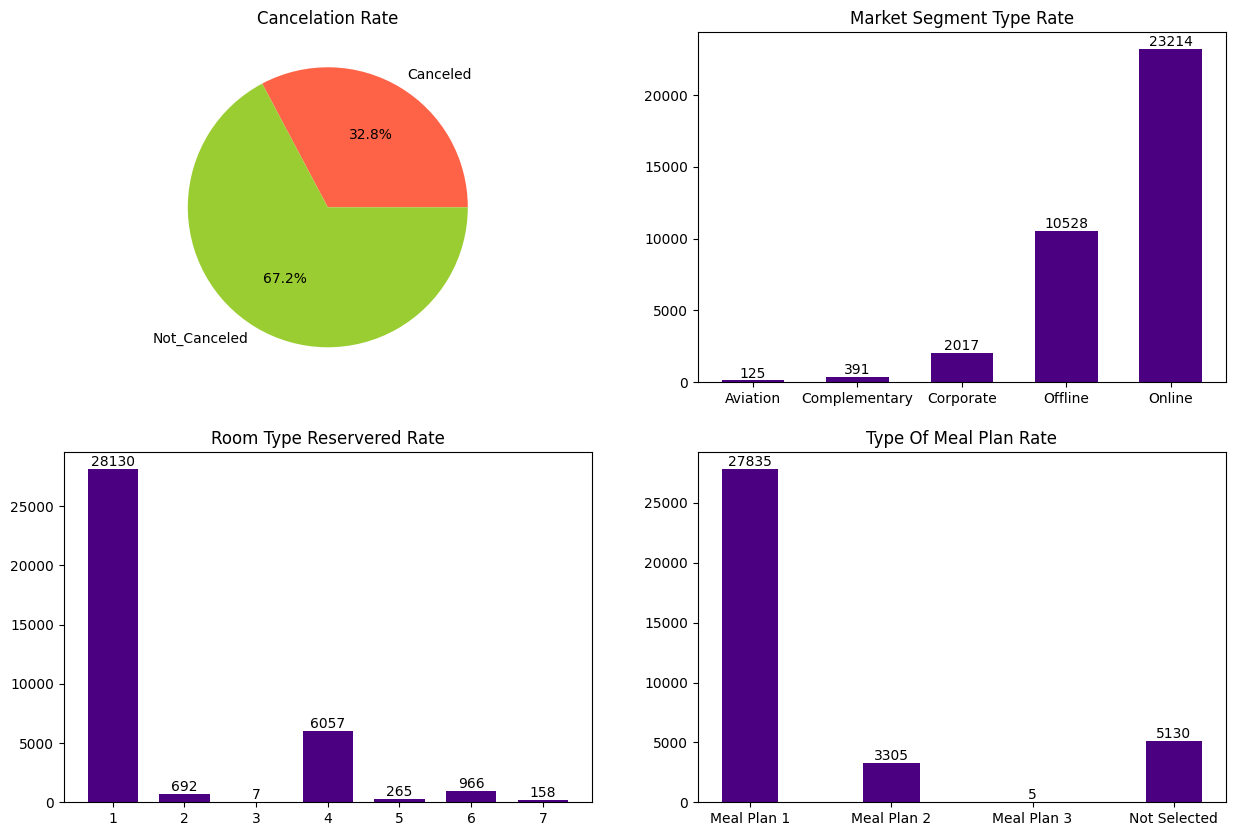

In [125]:
# categorical variables
cancelation_rate = pd.DataFrame(bookings.groupby('booking_status').Booking_ID.count()).reset_index()
market_segment_rate = pd.DataFrame(bookings.groupby('market_segment_type').Booking_ID.count()).reset_index()
room_type_rate = pd.DataFrame(bookings.groupby('room_type_reserved').Booking_ID.count()).reset_index()
room_type_rate['room_type_reserved'] = room_type_rate['room_type_reserved'].apply(lambda f: f.replace('Room_Type ', ''))
meal_type_rate = pd.DataFrame(bookings.groupby('type_of_meal_plan').Booking_ID.count()).reset_index()

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.pie(
    cancelation_rate['Booking_ID'], 
    labels=cancelation_rate['booking_status'],
    colors=['tomato', 'yellowgreen'],
    autopct='%1.1f%%'
)
plt.title('Cancelation Rate')

plt.subplot(2, 2, 2)
bars = plt.bar(
    x=market_segment_rate['market_segment_type'],
    height=market_segment_rate['Booking_ID'],
    color='indigo',
    width=0.6
)
plt.bar_label(bars)
plt.title('Market Segment Type Rate')

plt.subplot(2, 2, 3)
bars = plt.bar(
    x=room_type_rate['room_type_reserved'],
    height=room_type_rate['Booking_ID'],
    color='indigo',
    width=0.7
)
plt.bar_label(bars)
plt.title('Room Type Reservered Rate')

plt.subplot(2, 2, 4)
bars = plt.bar(
    x=meal_type_rate['type_of_meal_plan'],
    height=meal_type_rate['Booking_ID'],
    color='indigo',
    width=0.4
)
plt.bar_label(bars)
plt.title('Type Of Meal Plan Rate')

plt.show()


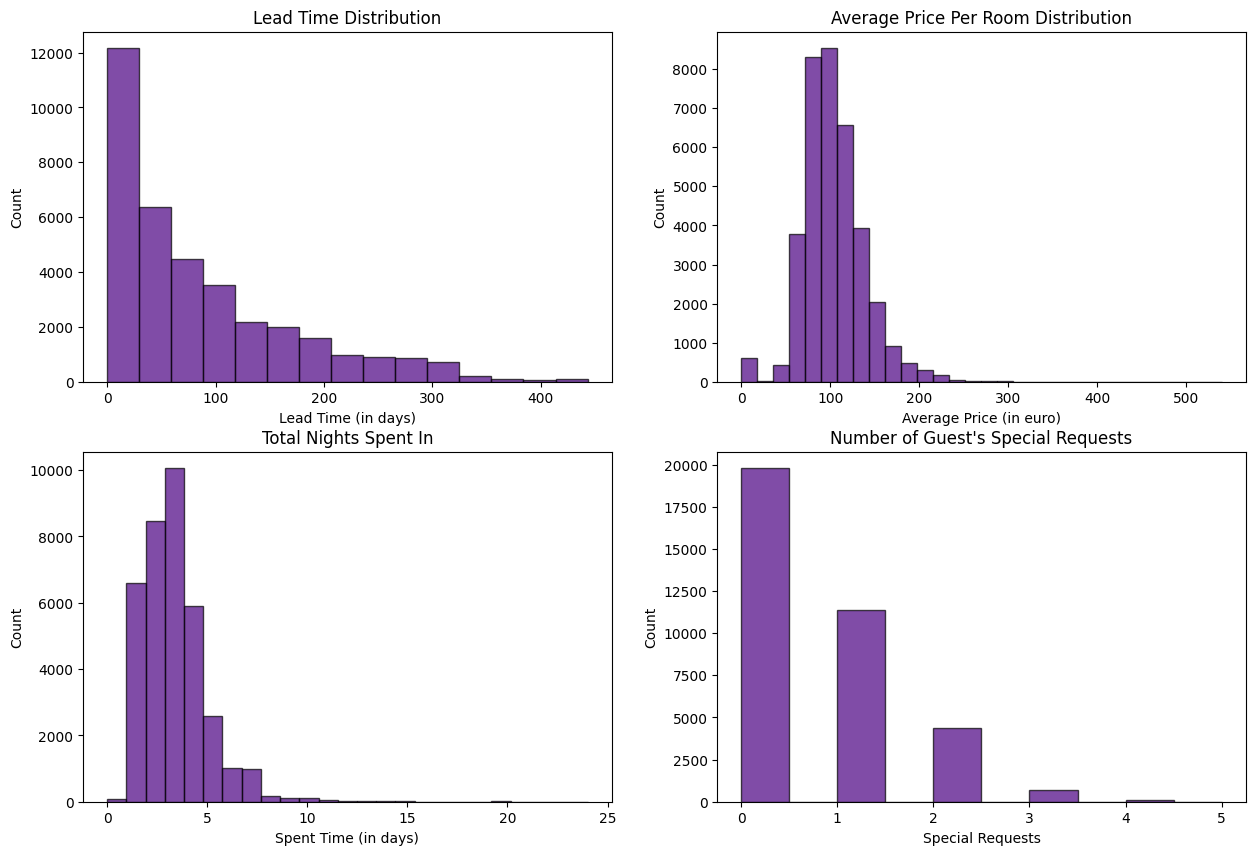

In [153]:
# numerical variables

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.hist(
    bookings['lead_time'],
    bins=15,
    color='indigo',
    edgecolor='black',
    alpha=0.7
)
plt.xlabel('Lead Time (in days)')
plt.ylabel('Count')
plt.title('Lead Time Distribution')

plt.subplot(2, 2, 2)
plt.hist(
    bookings['avg_price_per_room'],
    bins=30,
    color='indigo',
    edgecolor='black',
    alpha=0.7
)
plt.xlabel('Average Price (in euro)')
plt.ylabel('Count')
plt.title('Average Price Per Room Distribution')

plt.subplot(2, 2, 3)
plt.hist(
    bookings['total_nights'],
    bins=25,
    color='indigo',
    edgecolor='black',
    alpha=0.7
)
plt.xlabel('Spent Time (in days)')
plt.ylabel('Count')
plt.title('Total Nights Spent In')

plt.subplot(2, 2, 4)
plt.hist(
    bookings['no_of_special_requests'],
    color='indigo',
    edgecolor='black',
    alpha=0.7
)
plt.xlabel('Special Requests')
plt.ylabel('Count')
plt.title('Number of Guest\'s Special Requests')

plt.show()

### Conclusion:
- About categorical variables  
  We can say that the Hotel has more than **30% of booking cancelations**.  
  Also the most popular market segment type is **online**, and **room 1** and **meal 1** are the *leaders*.
- About numerical variables  
  All the data distributions are **right skewed**.  
  Average price per room has more **balanced to normal distribution**.

---
# 2. Descriptive Analysis & Business Intelligence
## 2.1 Booking Performance and Seasonality
Identifying peak and peak-off seasons.  
Analyzing bookings by day of week of arrival to find weekly patterns.  


# To be continued ...